In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import linalg as la

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [4]:
# Ex. 1

# a)

# generate a dataset simulating 3 variables
N = 10000
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2
X = np.array([x1, x2, x3])

# b)

# covariance matrix
cov = np.cov(X)
# find the eigenvectors of the covariance matrix
l, V = la.eig(cov)
# take only the real component
l = np.real_if_close(l)

# c)

# perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)
# rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(N-1)

np.set_printoptions(precision=3)

print('Covariance Matrix:')
print(cov,'\n')

print("Eigendecomposition of the covariance matrix:")
print("Eigenvalues:\n", l)
print("Eigenvectors:\n", V)

print("\nSVD:")
print("Eigenvalues:\n", l_svd)
print("Eigenvectors:\n", U)

print('\nThe two methods lead to the same eigenvectors and eigenvalues, unless differences due to the precision in the representation for small numbers (and differences in the order).')

# d)

Lambda = np.diag(np.sort(l)[::-1]) #sort the eigenvalues in descending order
p = Lambda[0][0] / Lambda.trace()
p2 = (Lambda[0][0] + Lambda[1][1])/Lambda.trace()

print("\nBy selecting the first component, we retain {:.4}% of the total variability.".format(np.real_if_close(p)*100) )

print("The second eigenvalue is negligible with respect to the other two. This is reasonable since there is a variable that is linearly dependent from the others and consequently with a proper rotation in the coordinate space we can find a basis in which almost all the information is held by two only variables.")

print("By reducing the dimensionality to the two largest eigenvalues, {:.4}% of the total dataset's variability is explained.".format(np.real_if_close(p2)*100))

Covariance Matrix:
[[ 1.005  0.968  2.977]
 [ 0.968  9.856 11.791]
 [ 2.977 11.791 17.745]] 

Eigendecomposition of the covariance matrix:
Eigenvalues:
 [ 2.658e+01 -2.227e-16  2.024e+00]
Eigenvectors:
 [[-0.116 -0.816  0.566]
 [-0.577 -0.408 -0.708]
 [-0.809  0.408  0.424]]

SVD:
Eigenvalues:
 [2.658e+01 2.024e+00 1.673e-31]
Eigenvectors:
 [[-0.116  0.566 -0.816]
 [-0.577 -0.708 -0.408]
 [-0.809  0.424  0.408]]

The two methods lead to the same eigenvectors and eigenvalues, unless differences due to the precision in the representation for small numbers (and differences in the order).

By selecting the first component, we retain 92.93% of the total variability.
The second eigenvalue is negligible with respect to the other two. This is reasonable since there is a variable that is linearly dependent from the others and consequently with a proper rotation in the coordinate space we can find a basis in which almost all the information is held by two only variables.
By reducing the dimensio

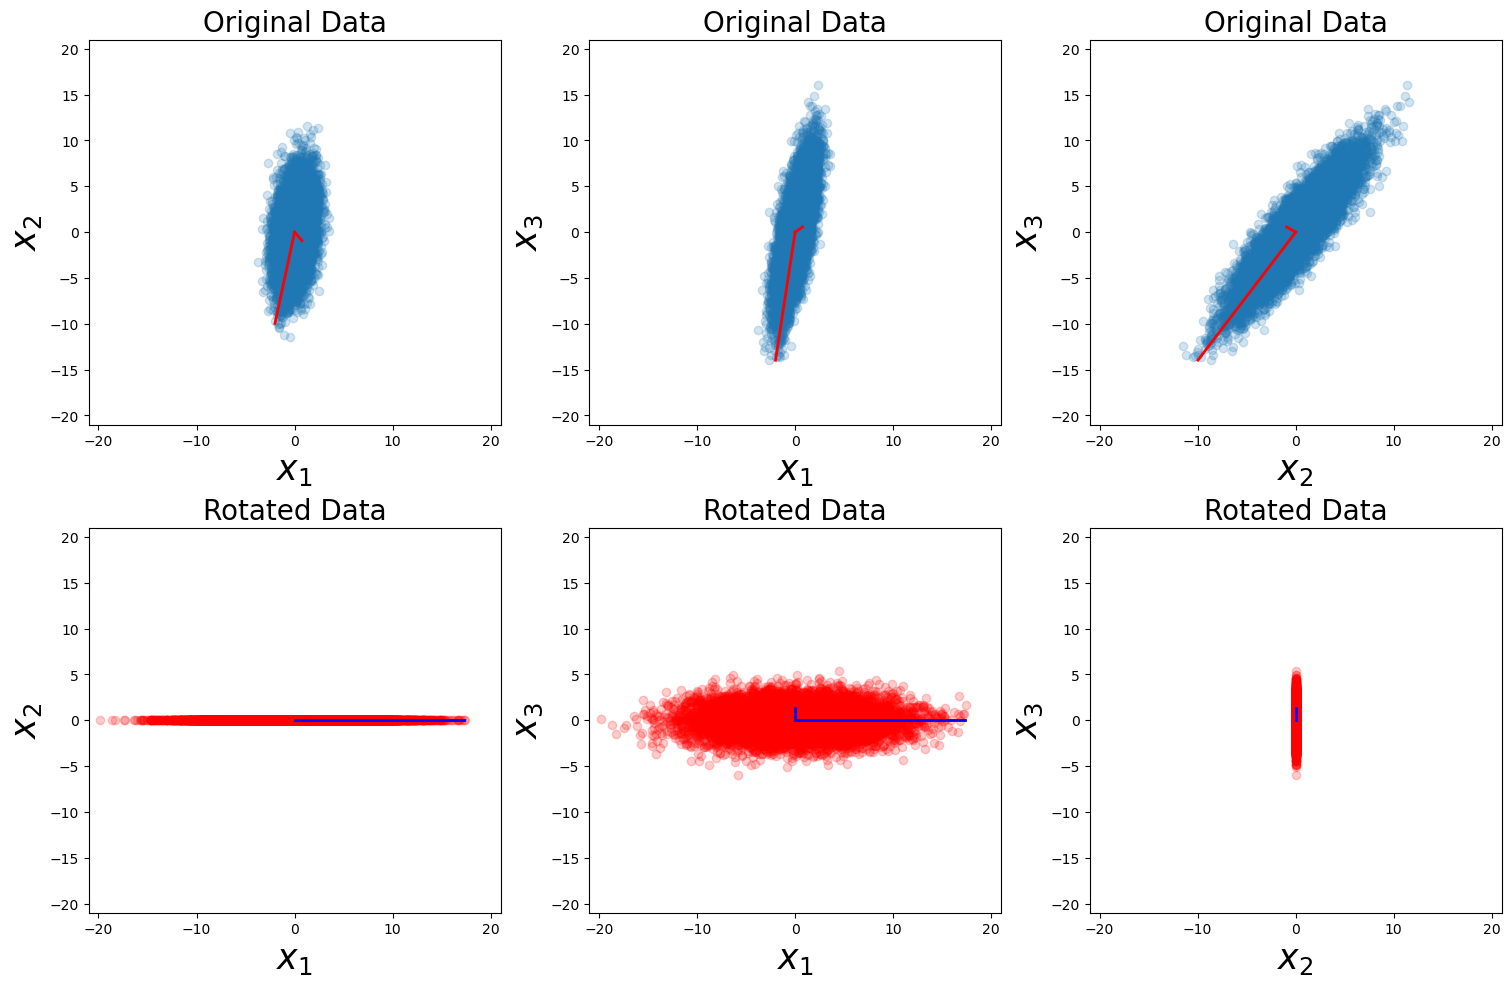

In the first and third plot, the data after the rotation are aligned in a narrow line along one principal axis in the new basis. Reducing the dimensionality of the problem is geometrically represented by finding the proper plane on which the data are actually mostly distributed on. The second plot contains therefore all the useful information. It is visible then how two only features are enough to describe properly this dataset. (The last eigenvector is not visible in the last two plots due to the fact that it is very small. In the rotated basis the eigenvectors are orthogonal.)


In [5]:
fig, ax = plt.subplots(ncols=3, nrows=2, constrained_layout=True, figsize=(15,9.75))

plt.rc('font', family='serif', size=8)
plt.rc('text', usetex=False)
plt.rc('mathtext', fontset='cm')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=20)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 0.65

# original data distribution

ax[0,0].scatter(X[0,:], X[1,:], alpha=0.2)
# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    ax[0,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax[0,0].axis([-21,21,-21,21])
ax[0,0].set_title('Original Data')
ax[0,0].set_xlabel('$x_1$', size=25)
ax[0,0].set_ylabel('$x_2$', size=25)

ax[0,1].scatter(X[0,:], X[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[0,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax[0,1].axis([-21,21,-21,21])
ax[0,1].set_title('Original Data')
ax[0,1].set_xlabel('$x_1$', size=25)
ax[0,1].set_ylabel('$x_3$', size=25)

ax[0,2].scatter(X[1,:], X[2,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax[0,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax[0,2].axis([-21,21,-21,21])
ax[0,2].set_title('Original Data')
ax[0,2].set_xlabel('$x_2$', size=25)
ax[0,2].set_ylabel('$x_3$', size=25)

# rotated dataset

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp = np.dot(V.T, X)

ax[1,0].scatter(Xp[0,:], Xp[1,:], alpha=0.2, c='r')
for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'b-', lw=2)
ax[1,0].axis([-21,21,-21,21])
ax[1,0].set_title('Rotated Data')
ax[1,0].set_xlabel('$x_1$', size=25)
ax[1,0].set_ylabel('$x_2$', size=25)

ax[1,1].scatter(Xp[0,:], Xp[2,:], alpha=0.2, c='r')
for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'b-', lw=2)
ax[1,1].axis([-21,21,-21,21])
ax[1,1].set_title('Rotated Data')
ax[1,1].set_xlabel('$x_1$', size=25)
ax[1,1].set_ylabel('$x_3$', size=25)

ax[1,2].scatter(Xp[1,:], Xp[2,:], alpha=0.2, c='r')
for li, vi in zip(l, np.dot(V.T, V)):
    ax[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'b-', lw=2)
ax[1,2].axis([-21,21,-21,21])
ax[1,2].set_title('Rotated Data')
ax[1,2].set_xlabel('$x_2$', size=25)
ax[1,2].set_ylabel('$x_3$', size=25)

plt.show()

print("In the first and third plot, the data after the rotation are aligned in a narrow line along one principal axis in the new basis. Reducing the dimensionality of the problem is geometrically represented by finding the proper plane on which the data are actually mostly distributed on. The second plot contains therefore all the useful information. It is visible then how two only features are enough to describe properly this dataset. (The last eigenvector is not visible in the last two plots due to the fact that it is very small. In the rotated basis the eigenvectors are orthogonal.)")

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [7]:
# Ex. 2.

# add uncorrelated random noise

n = 10
random_noise = np.zeros((n, N))

for i in range(n):
    random_noise[i] = np.random.normal(0, 1/20, N)
    
for i in range(3):
    for j in range(n):
        X[i] = X[i] + random_noise[j]

# covariance matrix
covn = np.cov(X)
# find the eigenvectors of the covariance matrix
ln, Vn = la.eig(covn)
# take only the real component
ln = np.real_if_close(ln)

print('Covariance Matrix:')
print(covn,'\n')

print("Eigendecomposition of the covariance matrix:")
print("Eigenvalues:\n", ln)
print("Eigenvectors:\n", Vn)

Lambdan = np.diag(np.sort(ln)[::-1]) #sort the eigenvalues in descending order
pn = Lambdan[0][0]/Lambdan.trace()
p2n = (Lambdan[0][0]+Lambdan[1][1])/Lambdan.trace()

print("\nBy selecting the first component, we retain {:.4}% of the total variability.".format(np.real_if_close(pn)*100) )
print("By reducing the dimensionality to the two largest eigenvalues, {:.4}% of the total dataset's variability is explained.".format(np.real_if_close(p2n)*100))

Covariance Matrix:
[[ 1.05   1.027  3.034]
 [ 1.027  9.929 11.862]
 [ 3.034 11.862 17.814]] 

Eigendecomposition of the covariance matrix:
Eigenvalues:
 [26.737  0.032  2.024]
Eigenvectors:
 [[-0.119 -0.814  0.568]
 [-0.577 -0.409 -0.707]
 [-0.808  0.412  0.422]]

By selecting the first component, we retain 92.86% of the total variability.
By reducing the dimensionality to the two largest eigenvalues, 99.89% of the total dataset's variability is explained.


Because $\mu_{noise} = 0$, $\sigma_{noise}\ll\sigma_{dataset}$ and the noise being statistically indipendent from the dataset, the added background doesn't significantly affect the amount of information given by the two largest eigenvalues, the percentage remains comparable to the ideal case without noise.

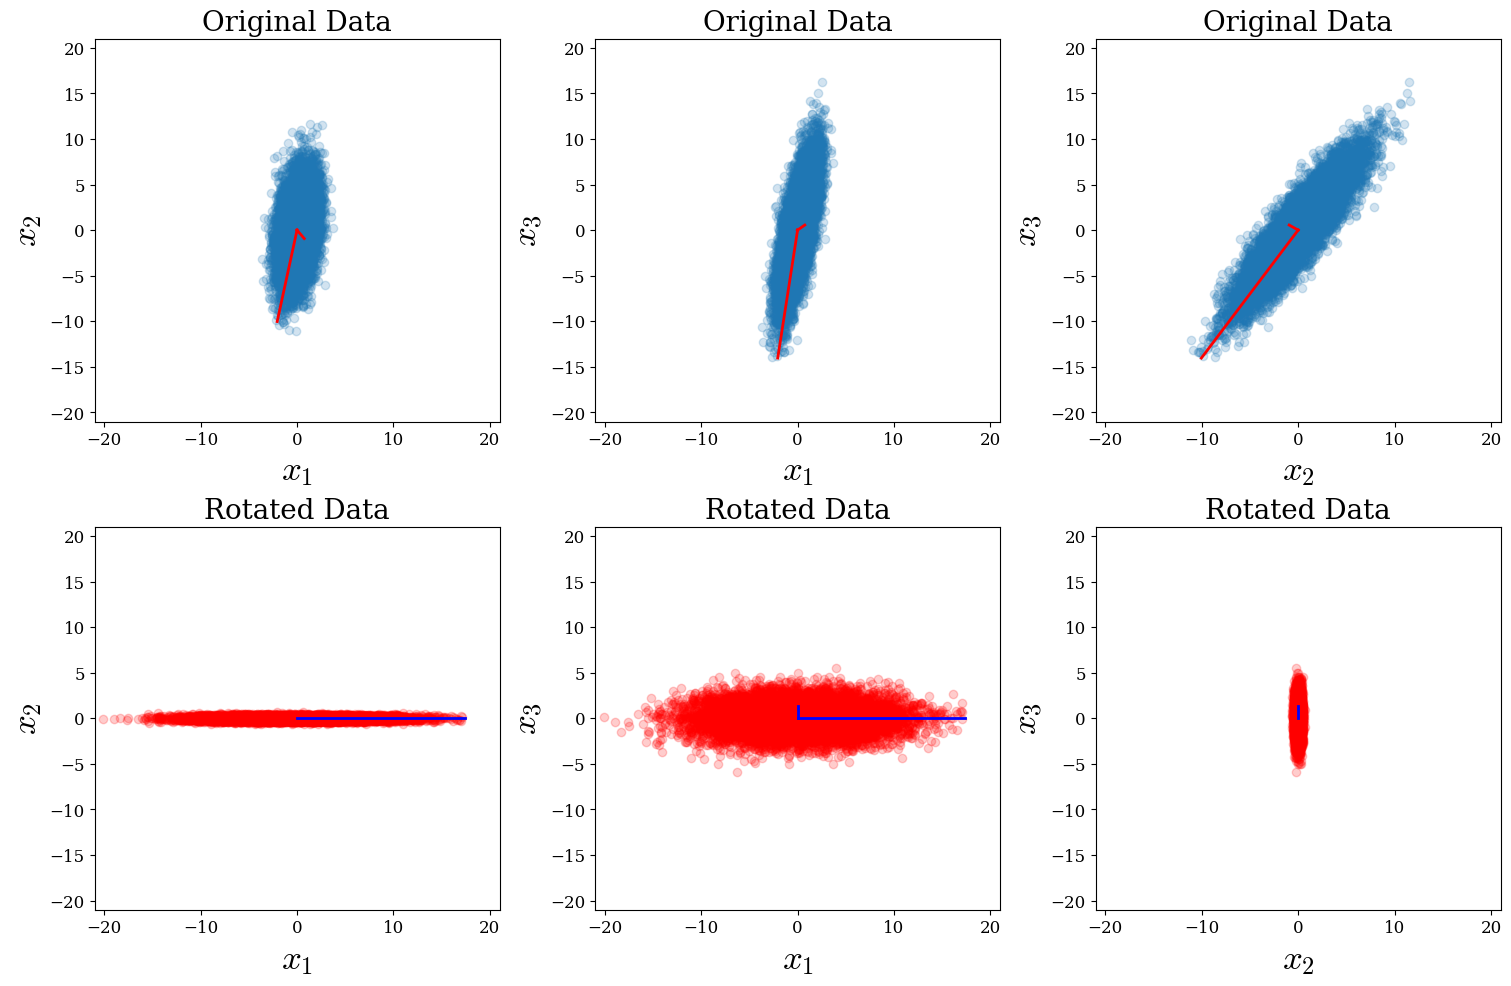

From the plots it is possible to see how now, after data rotation, the narrow lines are slightly more spread due to the addition of noise. However, the spread is very low and the orders of magnitude of the results we can obtain with PCA using the two largest eigenvalues are comparable.


In [8]:
fig, ax = plt.subplots(ncols=3, nrows=2, constrained_layout=True, figsize=(15,9.75))

plt.rc('font', family='serif', size=8)
plt.rc('text', usetex=False)
plt.rc('mathtext', fontset='cm')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=20)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 0.65

# the original data distribution

ax[0,0].scatter(X[0,:], X[1,:], alpha=0.2)
# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(ln, Vn.T):
    ax[0,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax[0,0].axis([-21,21,-21,21])
ax[0,0].set_title('Original Data')
ax[0,0].set_xlabel('$x_1$', size=25)
ax[0,0].set_ylabel('$x_2$', size=25)

ax[0,1].scatter(X[0,:], X[2,:], alpha=0.2)
for li, vi in zip(ln, Vn.T):
    ax[0,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax[0,1].axis([-21,21,-21,21])
ax[0,1].set_title('Original Data')
ax[0,1].set_xlabel('$x_1$', size=25)
ax[0,1].set_ylabel('$x_3$', size=25)

ax[0,2].scatter(X[1,:], X[2,:], alpha=0.2)
for li, vi in zip(ln, Vn.T):
    ax[0,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax[0,2].axis([-21,21,-21,21])
ax[0,2].set_title('Original Data')
ax[0,2].set_xlabel('$x_2$', size=25)
ax[0,2].set_ylabel('$x_3$', size=25)

#rotated dataset

# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xnp = np.dot(Vn.T, X)

ax[1,0].scatter(Xnp[0,:], Xnp[1,:], alpha=0.2, c='r')
for li, vi in zip(ln, np.dot(Vn.T, Vn)):
    ax[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'b-', lw=2)
ax[1,0].axis([-21,21,-21,21])
ax[1,0].set_title('Rotated Data')
ax[1,0].set_xlabel('$x_1$', size=25)
ax[1,0].set_ylabel('$x_2$', size=25)

ax[1,1].scatter(Xnp[0,:], Xnp[2,:], alpha=0.2, c='r')
for li, vi in zip(ln, np.dot(Vn.T, Vn)):
    ax[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'b-', lw=2)
ax[1,1].axis([-21,21,-21,21])
ax[1,1].set_title('Rotated Data')
ax[1,1].set_xlabel('$x_1$', size=25)
ax[1,1].set_ylabel('$x_3$', size=25)

ax[1,2].scatter(Xnp[1,:], Xnp[2,:], alpha=0.2, c='r')
for li, vi in zip(ln, np.dot(Vn.T, Vn)):
    ax[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'b-', lw=2)
ax[1,2].axis([-21,21,-21,21])
ax[1,2].set_title('Rotated Data')
ax[1,2].set_xlabel('$x_2$', size=25)
ax[1,2].set_ylabel('$x_3$', size=25)

plt.show()

print("From the plots it is possible to see how now, after data rotation, the narrow lines are slightly more spread due to the addition of noise. However, the spread is very low and the orders of magnitude of the results we can obtain with PCA using the two largest eigenvalues are comparable.")

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [11]:
# Ex. 3.

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data?dl=1',nrows=1000)
data.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','fCategory']
print('Dataset:')
print(data)

del data['fCategory']

cov_magic = np.cov(data.T)
l_magic, V_magic = la.eig(cov_magic)
l_magic = np.real_if_close(l_magic)

print('\nCovariance Matrix:')
print(cov_magic,'\n')

print("Eigendecomposition of the covariance matrix:")
print("Eigenvalues:\n", l_magic)
print("Eigenvectors:\n", V_magic)

Lambda_magic = np.diag(np.sort(l_magic)[::-1])
p = Lambda_magic[0][0]/Lambda_magic.trace()
print("\nBy selecting the first component, we retain {:.4}% of the total variability.".format(np.real_if_close(p)*100) )

threshold = .99  #threshold for the dataset percentage
info = p  #variable holding the updated precision value
i = 1  #index of the eigenvalues
while info < threshold:
    info += Lambda_magic[i][i]/Lambda_magic.trace()
    i += 1
    
print("\nTo have {:.4}% of the total dataset's variability explained, the first {} eigenvalues are needed.".format(info*100,i))

Dataset:
      fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0     31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1    162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2     23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3     75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4     51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
..        ...       ...     ...     ...     ...       ...      ...       ...   
995   13.3396   10.5628  2.1917  0.7910  0.4019  -14.8910  -2.3901   11.9001   
996   49.8521   11.4525  2.3971  0.4529  0.2305   52.6071  39.3622   -8.6905   
997   29.2688   14.2779  2.5723  0.4016  0.2021  -21.2132 -23.9344   -8.2073   
998   21.9470   20.3281  2.4864  0.4078  0.2072   12.8338  10.4007   14.8348   
999   61.2167   21.0987  2.8993  0.2875  0.1482  -75.2965  27.4636  -18.4181   

      fAlpha    fDist fCategor